## Rabiul Ruhan
rabiulruhan381@gmail.com

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
import gradio as gr
import joblib

## 1. Data Loading (5 Marks)
Load the chosen dataset into your environment and display the first few rows along with the shape to verify correctness.


In [29]:
url = "https://raw.githubusercontent.com/RABIUL-RUHAN/ML_files/refs/heads/main/diabetes.csv"
df = pd.read_csv(url)

In [30]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [31]:
df.shape

(768, 9)

## 2. Data Preprocessing (10 Marks)
Perform and document at least 5 distinct preprocessing steps (e.g., handling missing values, encoding, scaling, outlier detection, feature engineering).


In [32]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [34]:
for col in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
    df[col] = df[col].replace(0, np.nan)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [36]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [37]:

for col in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
    df[col] = df[col].fillna(df[col].median())

In [38]:
!pip install ydata-profiling


In [39]:
from ydata_profiling import ProfileReport

profile = ProfileReport( df , title="Pima Indians Diabetes dataset", explorative = True  )

profile.to_file("ydata.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 9/9 [00:00<00:00, 82.63it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

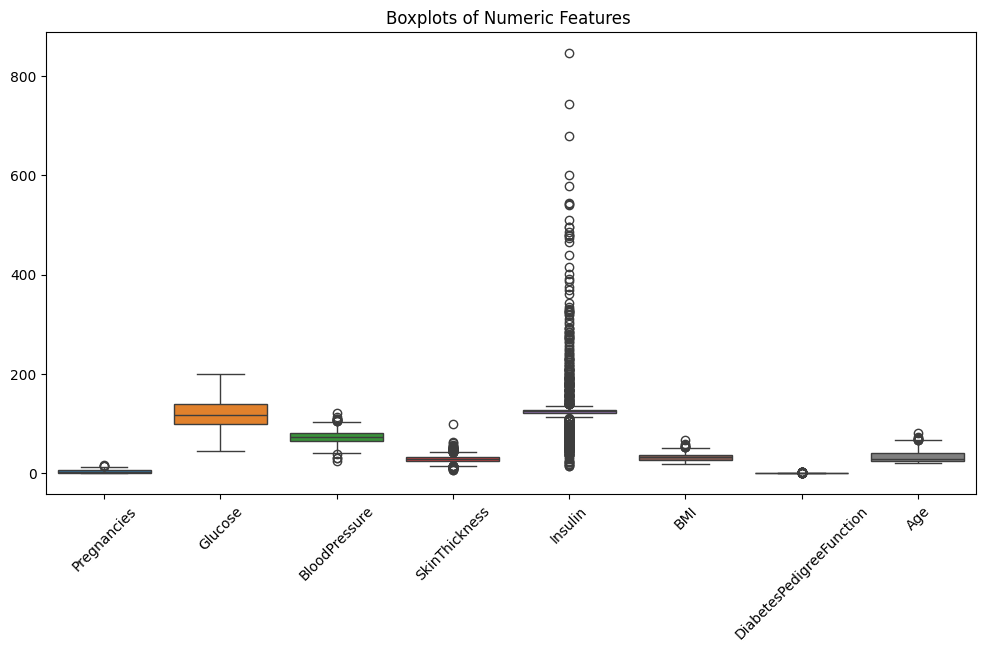

In [40]:
numeric_cols = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']

plt.figure(figsize=(12,6))
sns.boxplot(data=df[numeric_cols])
plt.xticks(rotation=45)
plt.title("Boxplots of Numeric Features ")
plt.show()

In [41]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    return df

for col in ['Insulin', 'SkinThickness']:
    df = remove_outliers_iqr(df, col)

## 3. Pipeline Creation (10 Marks)
Construct a standard Machine Learning pipeline that integrates preprocessing and the model


In [42]:

X = df[numeric_cols]
y = df['Outcome']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)



In [44]:
preprocessor = ColumnTransformer(

    [('num', StandardScaler(), numeric_cols)]
)


## 4. Primary Model Selection (5 Marks)
Choose a suitable algorithm and justify why this specific model was selected for the dataset.


## Model Selection
I am considering three model . and the models are
1. Random forest:
random forest captures non-linear relationships between features. it can handle feature interaction and robust to outliers
2. Logistic Regression:
it serves as a baseline model. and works well on medium size datasets
3. Gradient Boosting:
it works good on datasets where there is complex pattern and interaction between features.


## 5. Model Training (10 Marks)
Train your selected model using the training portion of your dataset.


In [45]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}
results = []

for name, model in models.items():
    pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred)
    })

results_df = pd.DataFrame(results).sort_values("F1 Score", ascending=False)
results_df



,Model,Accuracy,Precision,Recall,F1 Score
1,Random Forest,0.772727,0.672414,0.709091,0.690265
2,Gradient Boosting,0.746753,0.637931,0.672727,0.654867
0,Logistic Regression,0.733766,0.629630,0.618182,0.623853


## 6. Cross-Validation (10 Marks)
Apply Cross-Validation  to assess robustness and report the average score with standard deviation.


In [46]:
cv_results = []

for name, model in models.items():
    pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    scores = cross_val_score(pipe, X_train, y_train, cv=5, scoring='f1')

    cv_results.append({
        "Model": name,

        "CV Mean F1": scores.mean(),
        "CV Std F1": scores.std()
    })

cv_results_df = pd.DataFrame(cv_results).sort_values("CV Mean F1",  ascending=False)
cv_results_df = cv_results_df.round(4)
cv_results_df


,Model,CV Mean F1,CV Std F1
2,Gradient Boosting,0.6530,0.0371
1,Random Forest,0.6307,0.0106
0,Logistic Regression,0.6211,0.0302


## 7. Hyperparameter Tuning (10 Marks)
Optimize your model using search methods displaying both the parameters tested and the best results found.


I earlier see that random forest classifier gave the best result so i dont work with other model.and apply hypertuning only to random forest classifier

In [47]:
param_grid = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [None, 5, 10],
    'model__min_samples_split': [2, 5]
}

grid_search = GridSearchCV(
    Pipeline([
        ('preprocessor', preprocessor),
        ('model', RandomForestClassifier(random_state=42))
    ]),
    param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1
)


In [48]:

grid_search.fit(X_train, y_train)



GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['Pregnancies',
                                                                          'Glucose',
                                                                          'BloodPressure',
                                                                          'SkinThickness',
                                                                          'Insulin',
                                                                          'BMI',
                                                                          'DiabetesPedigreeFunction',
                                                                          'Age'])])),
                                       ('model',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'model__max_depth': [None, 5, 10],
                         'model__min_samples_split': [2, 5],
                         'model__n_estimators': [100, 200]},
             scoring='f1')

In [49]:

grid_search.best_params_

{'model__max_depth': 10,
 'model__min_samples_split': 2,
 'model__n_estimators': 200}

In [50]:
print(f"Grid best score: {grid_search.best_score_: .4}")

Grid best score:  0.6627


## 8. Best Model Selection (10 Marks)
Select  the final best-performing model based on the hyperparameter tuning results.


In [51]:
best_model = grid_search.best_estimator_

print("Best model selected")
print(f"Best parameters: {grid_search.best_params_}")

Best model selected
Best parameters: {'model__max_depth': 10, 'model__min_samples_split': 2, 'model__n_estimators': 200}


## 9. Model Performance Evaluation (10 Marks)
Evaluate the model on the test set and print comprehensive metrics suitable for the problem type.


In [52]:
# Make predictions
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Calculate metrics
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_proba):.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Accuracy: 0.7597
Precision: 0.6500
Recall: 0.7091
F1-Score: 0.6783
ROC-AUC: 0.8353

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.79      0.81        99
           1       0.65      0.71      0.68        55

    accuracy                           0.76       154
   macro avg       0.74      0.75      0.74       154
weighted avg       0.77      0.76      0.76       154



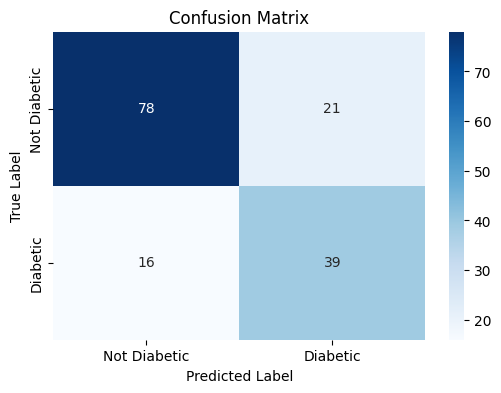

In [53]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Not Diabetic', 'Diabetic'],
    yticklabels=['Not Diabetic', 'Diabetic']
)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

## 10. Web Interface with Gradio (10 Marks)
Create a user-friendly Gradio web interface that takes user inputs and displays the prediction from your trained model.


In [54]:
import joblib

joblib.dump(best_model, "diabetes_model.pkl")
print("Model saved successfully!")

import gradio as gr
import pandas as pd
import numpy as np

model = joblib.load("diabetes_model.pkl")


FEATURE_COLUMNS = [
    "Pregnancies",
    "Glucose",
    "BloodPressure",
    "SkinThickness",
    "Insulin",
    "BMI",
    "DiabetesPedigreeFunction",
    "Age",
]


def predict_diabetes(
    Pregnancies,
    Glucose,
    BloodPressure,
    SkinThickness,
    Insulin,
    BMI,
    DiabetesPedigreeFunction,
    Age,
):

    input_df = pd.DataFrame(
        [[
            Pregnancies,
            Glucose,
            BloodPressure,
            SkinThickness,
            Insulin,
            BMI,
            DiabetesPedigreeFunction,
            Age,
        ]],
        columns=FEATURE_COLUMNS,
    )


    prediction = model.predict(input_df)[0]
    probability = model.predict_proba(input_df)[0][1]

    label = "Diabetic" if prediction == 1 else "Not Diabetic"

    return f"Prediction: {label}\nProbability of Diabetes: {probability:.2f}"


iface = gr.Interface(
    fn=predict_diabetes,
    inputs=[
        gr.Number(label="Pregnancies", value=0),
        gr.Number(label="Glucose", value=120),
        gr.Number(label="Blood Pressure", value=70),
        gr.Number(label="Skin Thickness", value=20),
        gr.Number(label="Insulin", value=80),
        gr.Number(label="BMI", value=25.0),
        gr.Number(label="Diabetes Pedigree Function", value=0.5),
        gr.Number(label="Age", value=30),
    ],
    outputs=gr.Textbox(label="Result"),
    title="🩺 Diabetes Prediction System",
    description="This app predicts whether a patient is diabetic using a pre-trained Machine Learning pipeline (scikit-learn)."
)

if __name__ == "__main__":
    iface.launch()

Model saved successfully!
It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://7b853b366bebf2ecb5.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


## 11. Deployment to Hugging Face (10 Marks)
Deploy the Gradio app to Hugging Face Spaces and ensure it is accessible via a public URL.


https://huggingface.co/spaces/RabiulRuhan/d_bet